<h2>Business Understanding</h2>

This note book describe the data set for 266 countries with the Co2 Emissions from 1960 to 2020

we will go through CRISP-DM Steps to answer the below questions

CRISP-DM
#Business Understanding
#Data Understanding
#Prepare Data
#Model Data
#Results
#Deploy

<h3>Questions</h3>
<ul>
<li>Question 1:  what are the total of Co2 emissions per region
<li>Question 2: Does any improve in the Co2 emissions across years  from 2008 to 2018
<li>Question 3:  What are the top countries that have the least Co2 emissions
</ul>



In [411]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


''' 
   Code below read the regions , 
    this file is contain the numbers of Co2 
    emissions till 2020 per country

'''
regions= pd.read_csv('.\Data\Regions.csv')
regions.head()


,Country Name,Region,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,Latin America & Caribbean,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.631696,208.837879,226.081890,214.785217,207.626699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,Other,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,...,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541,NaN,NaN
2,Afghanistan,South Asia,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,...,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,NaN,NaN
3,Africa Western and Central,Other,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,...,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544,NaN,NaN
4,Angola,Sub-Saharan Africa,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,...,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,NaN,NaN


<h2>Data Understanding</h2>
<p>we have entries for 266 countries for years from 1960 to 2020
<p>266 rows, 64 columns


In [386]:
regions.shape

(266, 64)

In [387]:
regions.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,3.160220,3.292338,3.462051,3.906006,4.007034,4.029132,3.992162,4.249468,4.363587,5.240497,...,4.494702,4.329083,4.315602,4.372246,4.280935,4.195690,4.148874,4.147100,4.154185,4.158613
std,12.940028,13.228900,14.324978,14.908996,14.601566,13.541355,12.571029,14.260618,13.359735,17.612837,...,4.906984,4.744704,4.655698,4.638656,4.590707,4.485394,4.411301,4.352639,4.336603,4.309214
min,0.007984,0.007857,0.008435,0.009336,0.011589,0.011851,0.013248,0.011791,-0.020098,0.016104,...,0.000000,0.000000,0.000000,0.035207,0.042976,0.039617,0.037904,0.026146,0.028010,0.026169
25%,0.272863,0.287237,0.291860,0.318526,0.310335,0.326207,0.339981,0.362998,0.407832,0.424451,...,0.846892,0.877548,0.887707,0.910227,0.922762,0.898524,0.937791,0.981747,0.931179,0.923675
50%,1.365692,1.372599,1.436939,1.426680,1.349243,1.417566,1.470231,1.743387,1.880386,2.012133,...,3.703489,3.316618,3.505394,3.718511,3.628807,3.568216,3.598959,3.462826,3.576049,3.564948
75%,3.160220,3.292338,3.462051,3.906006,4.007034,4.029132,3.992162,4.249468,4.363587,5.240497,...,6.068083,5.780377,5.898762,6.089142,5.796861,5.605858,5.706063,5.722254,5.648523,5.751220
max,204.631696,208.837879,226.081890,214.785217,207.626699,185.213644,172.158729,210.819017,194.917536,253.544574,...,34.544976,33.544700,32.305726,33.373132,31.927018,32.693532,32.470570,32.128042,32.179371,32.415639


<h2>Prepare Data</h2>
<p> Clean Data from the NA values

In [389]:
#Get a set of columns with  100% of the values missing
most_missing_cols = set(regions.columns[regions.isnull().mean() ==1])

most_missing_cols

set()

In [316]:
'''drop the columns full of na values for 2019
and 2020 becuase there is no data in them
'''
regions = regions.dropna(axis=1,how='all')

<p>Fill na values with mean in the years per row to calculate the evolution of Co2 emissions

In [317]:

regions =regions.fillna(regions.mean(),axis=0)
regions

,Country Name,Region,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,Latin America & Caribbean,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.631696,208.837879,226.081890,214.785217,207.626699,...,4.494702,4.329083,4.315602,4.372246,4.280935,4.195690,4.148874,4.147100,4.154185,4.158613
1,Africa Eastern and Southern,Other,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,...,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
2,Afghanistan,South Asia,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
3,Africa Western and Central,Other,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,...,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
4,Angola,Sub-Saharan Africa,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,Europe & Central Asia,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,3.160220,3.292338,3.462051,3.906006,4.007034,...,4.494702,4.329083,4.315602,4.372246,4.280935,4.195690,4.148874,4.147100,4.154185,4.158613
262,"Yemen, Rep.",Middle East & North Africa,YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.011038,0.013599,0.012729,0.014518,0.017550,...,1.139166,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682
263,South Africa,Sub-Saharan Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.727223,5.832621,5.887168,5.961337,6.332343,...,8.004039,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645
264,Zambia,Sub-Saharan Africa,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,3.160220,3.292338,3.462051,3.906006,0.946606,...,0.186907,0.194032,0.218210,0.277909,0.284058,0.311693,0.319282,0.341615,0.414748,0.446065


<h2>Evaluation</h2>
<p> Analyse the data Per Region

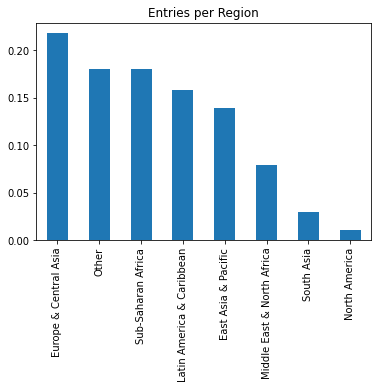

In [318]:
# How many Countries have Co2 emissions enteries per region 

ed_vals =regions['Region'].value_counts() 

(ed_vals/regions.shape[0]).plot(kind="bar");
plt.title("Entries per Region");

In [319]:

#Get the Co2 emissions for 2018 per region

0      4.158613
1      0.933541
2      0.200151
3      0.515544
4      0.887380
         ...   
261    4.158613
262    0.326682
263    7.496645
264    0.446065
265    0.849793
Name: 2018, Length: 266, dtype: float64


<h2>Question 1</h2>
<p>what are the total of Co2 emissions per region



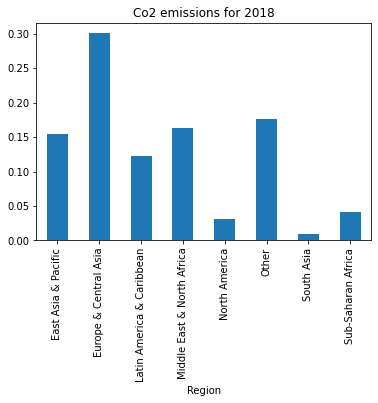

In [367]:
#Q1: what are the total of Co2 emissions per region
def clean_and_plot(df, title='Co2 emissions for 2018', plot=True):
    '''
    INPUT 
        df - a dataframe holding the 2018 column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        Co2EmissionPerRegion , represent the co2 emissins in 2018
    '''
    Co2PerRegion = df.groupby('Region')['2018'].sum()
    #study.rename(columns={'index': 'Region', '2018': 'Co2 Emissions'}, inplace=True)
    study_df = Co2PerRegion

    #study_df.set_index('Region', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(regions)

<h3>Question 2</h3>
<p> What the total Co2 emissions per year
<p> Get the dataset for countries in the years from 2008 to 2018    

In [376]:

Co2EmissionsFor10Years = regions[['Region','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']]
Co2EmissionsFor10Years

,Region,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Latin America & Caribbean,4.433706,4.494702,4.329083,4.315602,4.372246,4.280935,4.195690,4.148874,4.147100,4.154185,4.158613
1,Other,1.086449,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
2,South Asia,0.158356,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
3,Other,0.475025,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
4,Sub-Saharan Africa,1.155993,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Europe & Central Asia,4.433706,4.494702,4.329083,4.315602,4.372246,4.280935,4.195690,4.148874,4.147100,4.154185,4.158613
262,Middle East & North Africa,1.005383,1.139166,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682
263,Sub-Saharan Africa,8.568994,8.004039,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645
264,Sub-Saharan Africa,0.169669,0.186907,0.194032,0.218210,0.277909,0.284058,0.311693,0.319282,0.341615,0.414748,0.446065


<p>Visualize the evolution of Co2 reduction

In [391]:
SumOfCo2PerYear=pd.DataFrame(Co2EmissionsFor10Years.sum())
SumOfCo2PerYear

,0
2008,1179.365847
2009,1195.590855
2010,1151.536129
2011,1147.950178
2012,1163.017552
2013,1138.728700
2014,1116.053482
2015,1103.600373
2016,1103.128703
2017,1105.013226


In [378]:
#renam the column to be Co2 Emissions (Totals)
SumOfCo2PerYear.rename(columns={SumOfCo2PerYear.columns[0]:'Co2 Emissions'},index={'':'Year'})

,Co2 Emissions
2008,1179.365847
2009,1195.590855
2010,1151.536129
2011,1147.950178
2012,1163.017552
2013,1138.728700
2014,1116.053482
2015,1103.600373
2016,1103.128703
2017,1105.013226


<AxesSubplot:>

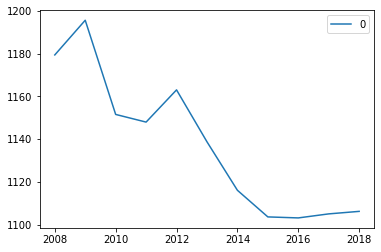

In [379]:
SumOfCo2PerYear.plot()

<p>draw the enhancements in Co2 reduction for all regions in 10 years

<h2> Question 3 </h2>
<p> Get the top countries has least poluttion in 2018

In [380]:
#Get all the countries Co2 emissions in 2018
CountriesCo22018 = countries[['Country Name','2018']]
CountriesCo22018=CountriesCo22018.dropna(subset=['2018'],axis=0)

In [404]:
#Q3: Get the top countries has least poluttion in 2018
CountriesCo22018.sort_values(by=["2018"], inplace = True)
CountriesCo22018.head(10)

,Country Name,2018
43,"Congo, Dem. Rep.",0.026169
213,Somalia,0.045975
16,Burundi,0.052795
229,Chad,0.069132
34,Central African Republic,0.070719
168,Malawi,0.086534
203,Rwanda,0.087791
173,Niger,0.102037
216,South Sudan,0.125730
151,Madagascar,0.128321


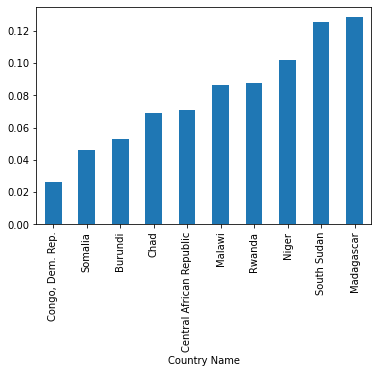

In [406]:
#plt.hist(data =CountriesCo22018.head(10),x='2018',bins = 15);
CountriesCo22018.head(10).plot(kind='bar', x='Country Name', legend=None);

<p> The above chart for top 10 countries has the least poluttion on 2018

<p> Below some Extra cells for trying Data

In [383]:

regionsIn2018 = regions.groupby('Region')['2018'].mean().reset_index()
regins2018Ds = pd.DataFrame(regionsIn2018)
regins2018Ds.set_index('Region', inplace=True)
regins2018Ds

,2018
Region,
East Asia & Pacific,4.616786
Europe & Central Asia,5.712907
Latin America & Caribbean,3.215076
Middle East & North Africa,8.579823
North America,11.632171
Other,4.036811
South Asia,1.306740
Sub-Saharan Africa,0.948664


In [409]:
regins2018Ds.sort_values(by='2018', ascending=False)
#np.sort(regins2018Ds)
regins2018Ds

,2018
Region,
East Asia & Pacific,4.616786
Europe & Central Asia,5.712907
Latin America & Caribbean,3.215076
Middle East & North Africa,8.579823
North America,11.632171
Other,4.036811
South Asia,1.306740
Sub-Saharan Africa,0.948664


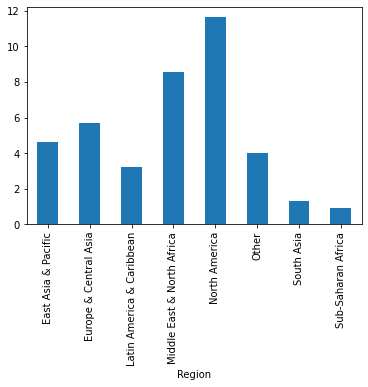

In [410]:
regins2018Ds.plot(kind='bar', legend=None);